In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing import image
import cv2


In [2]:
train_dir = r"C:\Users\sidharth\Desktop\TeamProjects\BrainTumorDataset\Dataset2_Multiclass\Train"
test_dir = r"C:\Users\sidharth\Desktop\TeamProjects\BrainTumorDataset\Dataset2_Multiclass\Test"


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


C:\Users\sidharth\.conda\envs\my_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 112s 617ms/step - accuracy: 0.5654 - loss: 1.2994 - val_accuracy: 0.2288 - val_loss: 6.6317
Epoch 2/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 65s 363ms/step - accuracy: 0.6734 - loss: 0.7936 - val_accuracy: 0.5461 - val_loss: 1.2984
Epoch 3/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 65s 363ms/step - accuracy: 0.7276 - loss: 0.6732 - val_accuracy: 0.7468 - val_loss: 0.6037
Epoch 4/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 65s 363ms/step - accuracy: 0.7438 - loss: 0.6407 - val_accuracy: 0.7963 - val_loss: 0.4936
Epoch 5/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 65s 364ms/step - accuracy: 0.7517 - loss: 0.6113 - val_accuracy: 0.6979 - val_loss: 1.0224
Epoch 6/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 65s 364ms/step - accuracy: 0.7784 - loss: 0.5673 - val_accuracy: 0.7864 - val_loss: 0.6071
Epoch 7/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 65s 364ms/step - accuracy: 0.7862 - loss: 0.5735 - val_accuracy: 0.7803 - val_loss: 0.6329
Epoch 8/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 65s 364ms/step - accuracy: 0.8036 - loss: 

Test Accuracy: 0.84


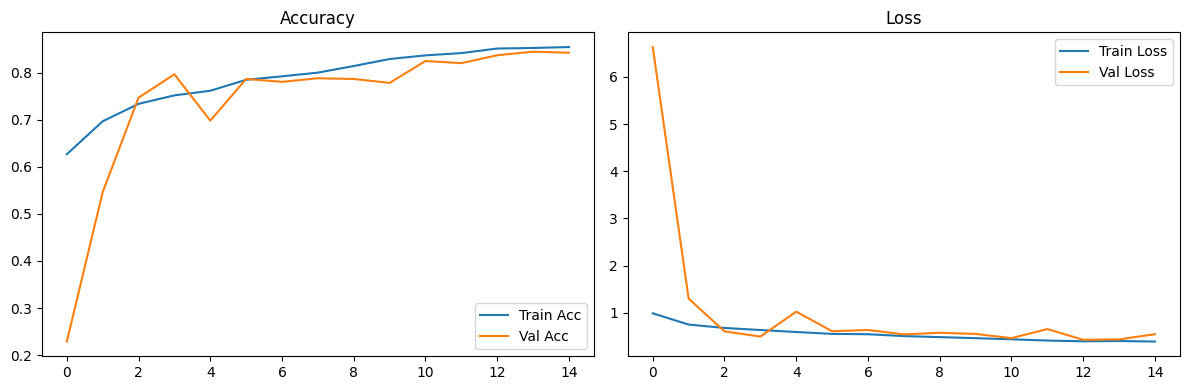

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# ✅ Step 3: Setup data directory
train_dir = r"C:\Users\sidharth\Desktop\TeamProjects\BrainTumorDataset\Dataset2_Multiclass\Train"
test_dir = r"C:\Users\sidharth\Desktop\TeamProjects\BrainTumorDataset\Dataset2_Multiclass\Test"

# ✅ Step 4: Image data preprocessing
img_size = 150
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

# ✅ Step 5: CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes: glioma, meningioma, notumor, pituitary
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ✅ Step 6: Train the model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator
)

# ✅ Step 7: Evaluate
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.2f}")

# ✅ Step 8: Save the model
model.save('brain_tumor_classifier.h5')

# ✅ Step 9: Plot Accuracy/Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [10]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.8492 - loss: 0.4924
Test Accuracy: 0.8421, Test Loss: 0.5435


In [11]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the model
model = load_model('brain_tumor_classifier.h5')

# Load and preprocess the image
img_path = r"C:\Users\sidharth\Desktop\TeamProjects\datasets\brain tumer mri dataset\Train\glioma\Tr-gl_0011.jpg"  # Change to your test file
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
class_idx = np.argmax(prediction)

# Class labels (make sure these match your dataset order)
class_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
print(f"Predicted class: {class_labels[class_idx]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predicted class: glioma


#### Improve Your Model Architecture
##### Upgrade Model Layers

In [2]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze base layers

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)


In [5]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=1e-6)



In [7]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

# Define image size and paths
img_size = 150
batch_size = 32  # or use 64
epochs = 50

train_dir = r"C:\Users\sidharth\Desktop\TeamProjects\BrainTumorDataset\Dataset2_Multiclass\Train"
val_dir = r"C:\Users\sidharth\Desktop\TeamProjects\BrainTumorDataset\Dataset2_Multiclass\Test"

# Data Augmentation and Normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

# Model Checkpoint to save best model
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max')

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[checkpoint]
)


Found 5713 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


C:\Users\sidharth\.conda\envs\my_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 722ms/step - accuracy: 0.6129 - loss: 0.9608  

179/179 ━━━━━━━━━━━━━━━━━━━━ 161s 894ms/step - accuracy: 0.6134 - loss: 0.9595 - val_accuracy: 0.7918 - val_loss: 0.5970
Epoch 2/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 688ms/step - accuracy: 0.8148 - loss: 0.4966  

179/179 ━━━━━━━━━━━━━━━━━━━━ 149s 834ms/step - accuracy: 0.8149 - loss: 0.4965 - val_accuracy: 0.8268 - val_loss: 0.4640
Epoch 3/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 145s 809ms/step - accuracy: 0.8472 - loss: 0.4262 - val_accuracy: 0.8177 - val_loss: 0.5111
Epoch 4/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 143s 798ms/step - accuracy: 0.8587 - loss: 0.3755 - val_accuracy: 0.8261 - val_loss: 0.4874
Epoch 5/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 658ms/step - accuracy: 0.8564 - loss: 0.3747  

179/179 ━━━━━━━━━━━━━━━━━━━━ 146s 814ms/step - accuracy: 0.8564 - loss: 0.3747 - val_accuracy: 0.8368 - val_loss: 0.4328
Epoch 6/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 665ms/step - accuracy: 0.8752 - loss: 0.3313  

179/179 ━━━━━━━━━━━━━━━━━━━━ 146s 815ms/step - accuracy: 0.8752 - loss: 0.3314 - val_accuracy: 0.8467 - val_loss: 0.4358
Epoch 7/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 664ms/step - accuracy: 0.8667 - loss: 0.3455  

179/179 ━━━━━━━━━━━━━━━━━━━━ 145s 810ms/step - accuracy: 0.8667 - loss: 0.3454 - val_accuracy: 0.8696 - val_loss: 0.3477
Epoch 8/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 154s 859ms/step - accuracy: 0.8815 - loss: 0.3089 - val_accuracy: 0.8673 - val_loss: 0.3648
Epoch 9/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 143s 801ms/step - accuracy: 0.8960 - loss: 0.2858 - val_accuracy: 0.8612 - val_loss: 0.3755
Epoch 10/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 670ms/step - accuracy: 0.8963 - loss: 0.2890  

179/179 ━━━━━━━━━━━━━━━━━━━━ 147s 821ms/step - accuracy: 0.8963 - loss: 0.2890 - val_accuracy: 0.8879 - val_loss: 0.2963
Epoch 11/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 146s 814ms/step - accuracy: 0.8937 - loss: 0.2911 - val_accuracy: 0.8734 - val_loss: 0.3745
Epoch 12/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 149s 835ms/step - accuracy: 0.8997 - loss: 0.2919 - val_accuracy: 0.8780 - val_loss: 0.3430
Epoch 13/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 152s 849ms/step - accuracy: 0.9017 - loss: 0.2733 - val_accuracy: 0.8795 - val_loss: 0.3214
Epoch 14/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 158s 885ms/step - accuracy: 0.9009 - loss: 0.2584 - val_accuracy: 0.8825 - val_loss: 0.3139
Epoch 15/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 707ms/step - accuracy: 0.9049 - loss: 0.2555  

179/179 ━━━━━━━━━━━━━━━━━━━━ 154s 862ms/step - accuracy: 0.9049 - loss: 0.2555 - val_accuracy: 0.9031 - val_loss: 0.2627
Epoch 16/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 149s 832ms/step - accuracy: 0.9127 - loss: 0.2409 - val_accuracy: 0.9024 - val_loss: 0.2561
Epoch 17/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 150s 836ms/step - accuracy: 0.9202 - loss: 0.2359 - val_accuracy: 0.9001 - val_loss: 0.2720
Epoch 18/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 150s 839ms/step - accuracy: 0.9144 - loss: 0.2273 - val_accuracy: 0.8902 - val_loss: 0.2928
Epoch 19/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 148s 826ms/step - accuracy: 0.9144 - loss: 0.2350 - val_accuracy: 0.8902 - val_loss: 0.3094
Epoch 20/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 145s 809ms/step - accuracy: 0.9131 - loss: 0.2238 - val_accuracy: 0.8863 - val_loss: 0.3250
Epoch 21/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 143s 800ms/step - accuracy: 0.9117 - loss: 0.2339 - val_accuracy: 0.8963 - val_loss: 0.2910
Epoch 22/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 143s 799ms/step - accuracy: 0.9101 - los

179/179 ━━━━━━━━━━━━━━━━━━━━ 143s 801ms/step - accuracy: 0.9213 - loss: 0.2178 - val_accuracy: 0.9108 - val_loss: 0.2357
Epoch 25/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 653ms/step - accuracy: 0.9138 - loss: 0.2173  

179/179 ━━━━━━━━━━━━━━━━━━━━ 143s 800ms/step - accuracy: 0.9138 - loss: 0.2173 - val_accuracy: 0.9115 - val_loss: 0.2300
Epoch 26/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 650ms/step - accuracy: 0.9203 - loss: 0.2180  

179/179 ━━━━━━━━━━━━━━━━━━━━ 143s 797ms/step - accuracy: 0.9203 - loss: 0.2180 - val_accuracy: 0.9153 - val_loss: 0.2322
Epoch 27/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 651ms/step - accuracy: 0.9248 - loss: 0.2084  

179/179 ━━━━━━━━━━━━━━━━━━━━ 143s 798ms/step - accuracy: 0.9247 - loss: 0.2084 - val_accuracy: 0.9161 - val_loss: 0.2295
Epoch 28/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 143s 799ms/step - accuracy: 0.9227 - loss: 0.2138 - val_accuracy: 0.9130 - val_loss: 0.2480
Epoch 29/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 143s 800ms/step - accuracy: 0.9208 - loss: 0.2016 - val_accuracy: 0.9138 - val_loss: 0.2356
Epoch 30/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 143s 799ms/step - accuracy: 0.9321 - loss: 0.1934 - val_accuracy: 0.8970 - val_loss: 0.3040
Epoch 31/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 653ms/step - accuracy: 0.9228 - loss: 0.2069  

179/179 ━━━━━━━━━━━━━━━━━━━━ 143s 800ms/step - accuracy: 0.9229 - loss: 0.2069 - val_accuracy: 0.9268 - val_loss: 0.2197
Epoch 32/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 143s 799ms/step - accuracy: 0.9339 - loss: 0.1889 - val_accuracy: 0.8932 - val_loss: 0.3117
Epoch 33/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 143s 799ms/step - accuracy: 0.9344 - loss: 0.1899 - val_accuracy: 0.9207 - val_loss: 0.2166
Epoch 34/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 143s 798ms/step - accuracy: 0.9303 - loss: 0.1918 - val_accuracy: 0.9130 - val_loss: 0.2492
Epoch 35/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 143s 797ms/step - accuracy: 0.9326 - loss: 0.1798 - val_accuracy: 0.9260 - val_loss: 0.2229
Epoch 36/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 143s 799ms/step - accuracy: 0.9353 - loss: 0.1851 - val_accuracy: 0.9100 - val_loss: 0.2477
Epoch 37/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 143s 797ms/step - accuracy: 0.9367 - loss: 0.1726 - val_accuracy: 0.9184 - val_loss: 0.2288
Epoch 38/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 142s 796ms/step - accuracy: 0.9295 - los

179/179 ━━━━━━━━━━━━━━━━━━━━ 143s 798ms/step - accuracy: 0.9380 - loss: 0.1748 - val_accuracy: 0.9321 - val_loss: 0.1957
Epoch 41/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 143s 797ms/step - accuracy: 0.9405 - loss: 0.1694 - val_accuracy: 0.9252 - val_loss: 0.2050
Epoch 42/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 142s 796ms/step - accuracy: 0.9301 - loss: 0.1880 - val_accuracy: 0.9321 - val_loss: 0.1870
Epoch 43/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 143s 800ms/step - accuracy: 0.9460 - loss: 0.1547 - val_accuracy: 0.9146 - val_loss: 0.2452
Epoch 44/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 144s 802ms/step - accuracy: 0.9335 - loss: 0.1786 - val_accuracy: 0.9260 - val_loss: 0.2192
Epoch 45/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 143s 801ms/step - accuracy: 0.9411 - loss: 0.1704 - val_accuracy: 0.9161 - val_loss: 0.2342
Epoch 46/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 143s 797ms/step - accuracy: 0.9388 - loss: 0.1664 - val_accuracy: 0.9214 - val_loss: 0.2181
Epoch 47/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 653ms/step - accuracy: 0.9387 - loss:

179/179 ━━━━━━━━━━━━━━━━━━━━ 143s 799ms/step - accuracy: 0.9386 - loss: 0.1663 - val_accuracy: 0.9474 - val_loss: 0.1684
Epoch 48/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 143s 799ms/step - accuracy: 0.9457 - loss: 0.1551 - val_accuracy: 0.9291 - val_loss: 0.1992
Epoch 49/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 143s 797ms/step - accuracy: 0.9389 - loss: 0.1629 - val_accuracy: 0.9191 - val_loss: 0.2278
Epoch 50/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 142s 796ms/step - accuracy: 0.9485 - loss: 0.1479 - val_accuracy: 0.9336 - val_loss: 0.1921


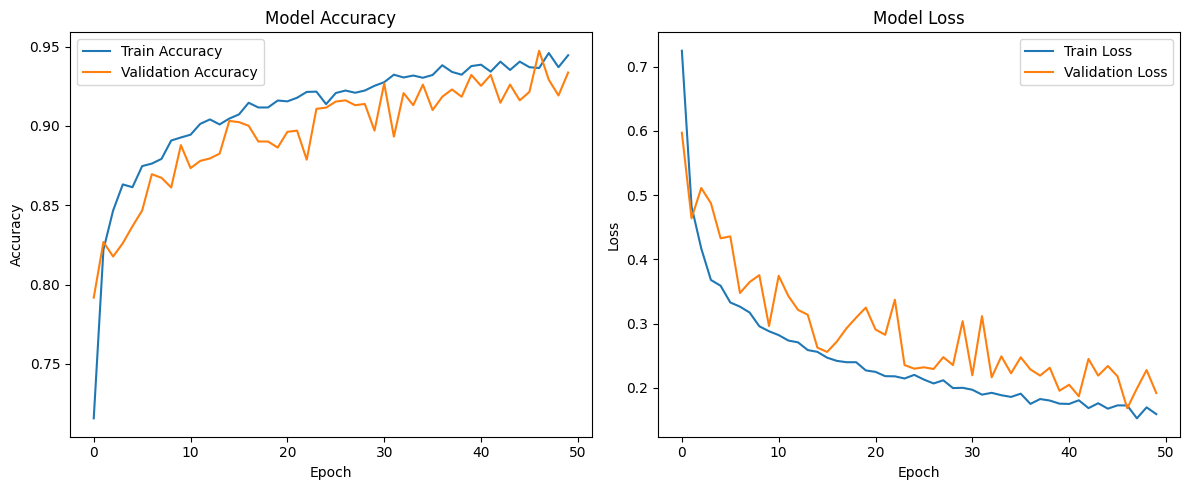

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
